In [1]:
import pandas as pd

In [5]:
data = {
    'age': [24, 27, 32, 45, 29, 36, 40],
    'salary': [45000, 52000, 61000, 80000, 48000, 75000, 90000],
    'city': ['Mumbai', 'Delhi', 'Chennai', 'Delhi', 'Mumbai', 'Chennai', 'Mumbai'],
    'designation': ['Junior', 'Senior', 'Senior', 'Manager', 'Junior', 'Manager', 'Senior']
}
df=pd.DataFrame(data)
df

,age,salary,city,designation
0,24,45000,Mumbai,Junior
1,27,52000,Delhi,Senior
2,32,61000,Chennai,Senior
3,45,80000,Delhi,Manager
4,29,48000,Mumbai,Junior
5,36,75000,Chennai,Manager
6,40,90000,Mumbai,Senior


In [7]:
df.isnull().sum()

age            0
salary         0
city           0
designation    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df['designation']=le.fit_transform(df['designation'])
df

,age,salary,city,designation
0,24,45000,Mumbai,0
1,27,52000,Delhi,2
2,32,61000,Chennai,2
3,45,80000,Delhi,1
4,29,48000,Mumbai,0
5,36,75000,Chennai,1
6,40,90000,Mumbai,2


In [26]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse_output=False,drop='first')
encoded_city=ohe.fit_transform(df[['city']])
encoded_city

array([[0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.]])

In [28]:
# Converting encoded matrix → DataFrame with column names
city_encoded_df = pd.DataFrame(
    encoded_city,
    columns=ohe.get_feature_names_out(['city'])
)

# Combine with original numeric data
df_final = pd.concat([df[['age', 'salary', 'designation']], city_encoded_df], axis=1)
df_final


,age,salary,designation,city_Delhi,city_Mumbai
0,24,45000,0,0.0,1.0
1,27,52000,2,1.0,0.0
2,32,61000,2,0.0,0.0
3,45,80000,1,1.0,0.0
4,29,48000,0,0.0,1.0
5,36,75000,1,0.0,0.0
6,40,90000,2,0.0,1.0


In [30]:
x=df_final.drop('designation',axis=1)
y=df_final['designation']
x,y

(   age  salary  city_Delhi  city_Mumbai
 0   24   45000         0.0          1.0
 1   27   52000         1.0          0.0
 2   32   61000         0.0          0.0
 3   45   80000         1.0          0.0
 4   29   48000         0.0          1.0
 5   36   75000         0.0          0.0
 6   40   90000         0.0          1.0,
 0    0
 1    2
 2    2
 3    1
 4    0
 5    1
 6    2
 Name: designation, dtype: int64)

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [34]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred = model.predict(x_test)
y_pred

array([1, 2])

In [41]:
from sklearn.metrics import accuracy_score

accu=accuracy_score(y_test,y_pred)
accu

0.0

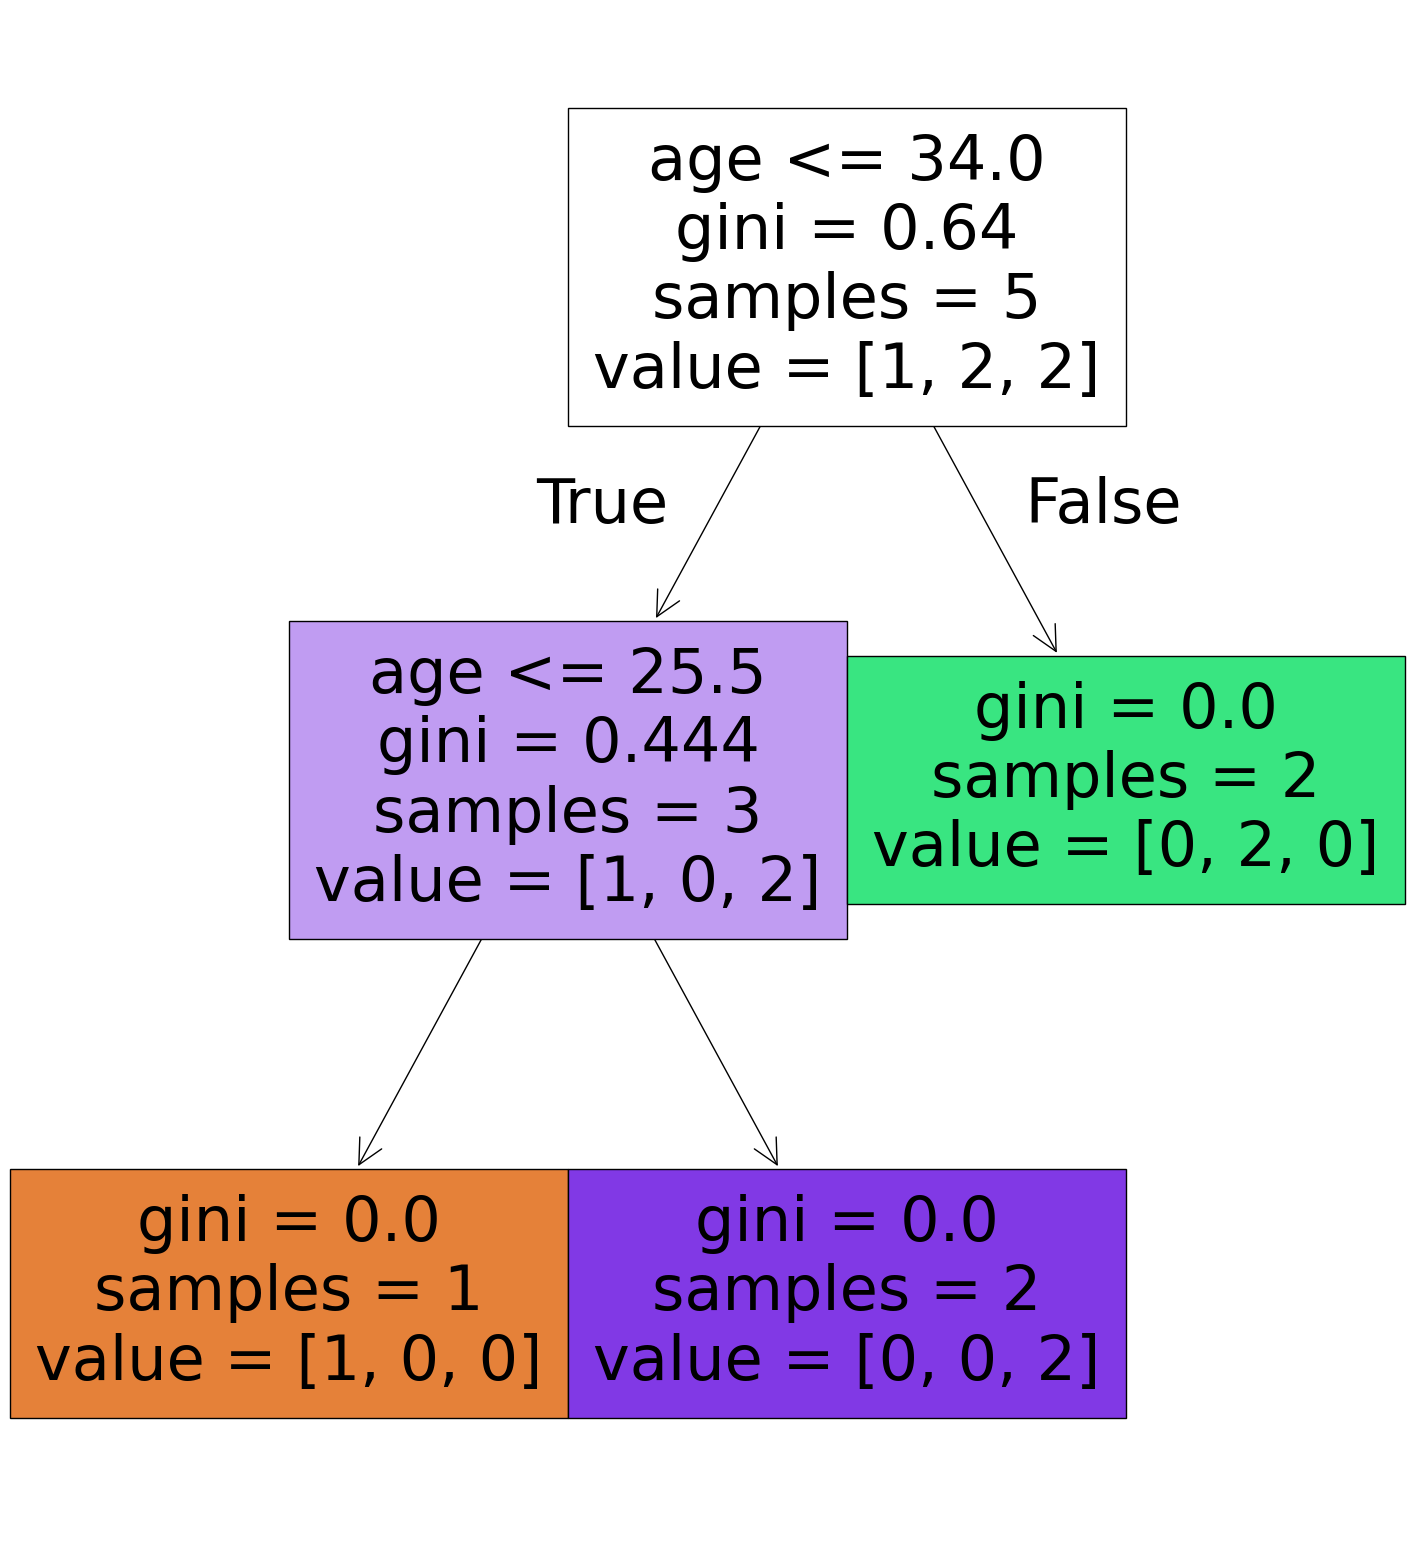

In [54]:
import matplotlib.pylab as plt
from sklearn import tree

plt.figure(figsize=(18,20))
tree.plot_tree(model,filled=True, feature_names=x.columns)
plt.show()